#Project_ML

# MLP Model – Variables, Parameters & Hyperparameters

| Model | Variables involved | Parameters and Hyperparameters |
|-------|---------------------|-------------------------------|
| **MLP** | **Input features (30 variables) from the WDBC dataset:**<br>- radius (mean, se, worst)<br>- texture (mean, se, worst)<br>- perimeter (mean, se, worst)<br>- area (mean, se, worst)<br>- smoothness (mean, se, worst)<br>- compactness (mean, se, worst)<br>- concavity (mean, se, worst)<br>- concave points (mean, se, worst)<br>- symmetry (mean, se, worst)<br>- fractal dimension (mean, se, worst)<br><br>**Target variable:**<br>- Diagnosis (Benign = 0, Malignant = 1) | **MLP Architecture:**<br>- Hidden layers: 3<br>- Units per layer: 500 – 500 – 500<br>- Activation: ReLU<br><br>**Training Setup:**<br>- Loss: cross-entropy<br>- Optimizer: SGD<br><br>**Performance:**<br>- Accuracy: 99.04%<br>- FPR: 1.27%<br>- FNR: 0.79%<br>- TPR: 99.21%<br>- TNR: 98.73%<br><br>**Additional Hyperparameters:**<br>- Batch Size: 128<br>- Architecture: [500, 500, 500] (3 hidden layers)<br>- Dropout Rate: None<br>- Epochs: 3000<br>- Learning Rate: 1e-2 |


In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization  
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # ADD THIS IMPORT

In [2]:
#data loading 
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [19]:
#data understanding 
df.describe()
df.info()
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [31]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
# convert the column diagnosis from being categorical to binary : (Malignant), B=0 (Benign)
df['diagnosis'] = df['diagnosis'].apply(lambda v: 1 if v == 'M' else 0)
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

In [45]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

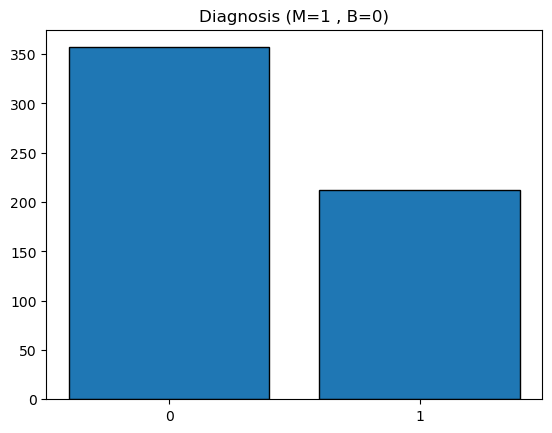

In [46]:

plt.hist(df['diagnosis'], 
         bins=[-0.5, 0.5, 1.5], 
         edgecolor='black',
         rwidth=0.8)   

plt.title('Diagnosis (M=1 , B=0)')
plt.xticks([0, 1])
plt.show()


In [11]:
#remove empty column 
df.drop( 'Unnamed: 32', axis=1 , inplace=True)
#remove the id because it doesnt infuluence the target
df.drop('id' , axis=1 , inplace=True)

In [48]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
#separate the features and the target 
X=df.drop('diagnosis' , axis=1)
y=df['diagnosis']

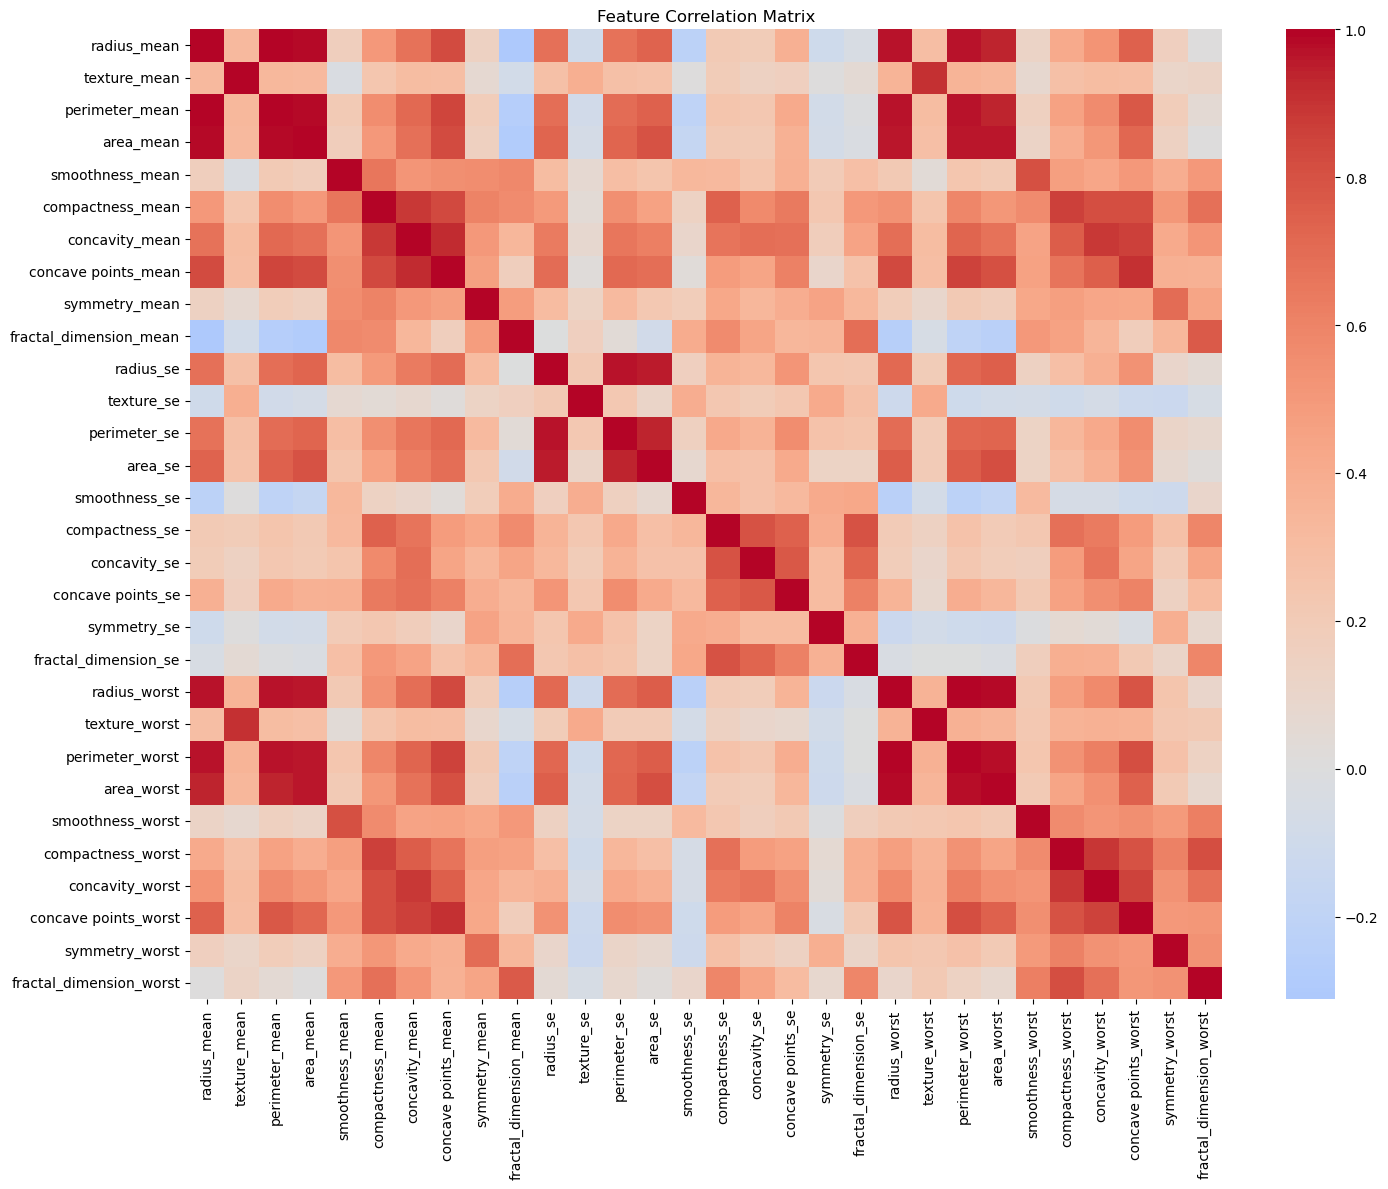

In [53]:
# look at how features are correlated 
correlation_matrix=X.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix , annot=False , cmap='coolwarm' , center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
df_staged= df.copy()

aggressive_features= ['radius_worst', 'concavity_worst','concave points_worst', 'area_worst', 'compactness_worst', 'perimeter_worst']

for feature in aggressive_features:
    min_val=df_staged[feature].min()
    max_val = df_staged[feature].max()
    df_staged[feature]=(df_staged[feature]-min_val)/(max_val-min_val)

cols=[feature for feature in aggressive_features]
df_staged['aggressiveness_score']=df_staged[cols].mean(axis=1)*100


def assign_morphology_stage(row):

    score = row['aggressiveness_score']
    radius = row['radius_worst']
    concavity = row['concavity_worst']
    diagnosis = row['diagnosis']
    
    if (score < 30) and (radius < 15) and (concavity < 0.1):
        return '1'
    
    elif (score > 80) or (diagnosis == 1 and (radius > 20 or concavity > 0.3)):
        return '4'
    
    elif (score > 60) and (diagnosis == 1):
        return '3'
    
    else:
        return '2'
    # Apply stage assignment
df_staged['morphology_stage'] = df_staged.apply(assign_morphology_stage, axis=1)

print("Morphological stages created successfully!")
print(f"\nStage Distribution:")
stage_counts = df_staged['morphology_stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    percentage = (count / len(df_staged)) * 100
    print(f"  Stage {stage}: {count} samples ({percentage:.1f}%)")


# Remove temporary normalized columns
# df_staged = df_staged.drop(norm_cols, axis=1)

Morphological stages created successfully!

Stage Distribution:
  Stage 1: 157 samples (27.6%)
  Stage 2: 278 samples (48.9%)
  Stage 4: 134 samples (23.6%)


In [14]:
# Select features for the model 
from sklearn.calibration import LabelEncoder


X2 = df_staged.drop([ 'diagnosis', 'morphology_stage', 'aggressiveness_score'], 
                   axis=1, errors='ignore')
y2 = df_staged['morphology_stage']


# Convert stages to numbers 
le = LabelEncoder()
y_encoded = le.fit_transform(y2)


In [54]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Standardize the features so all features will be on the same scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Training set: (455, 30)
Testing set: (114, 30)


In [16]:



# Split data into training (80%) and testing (20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# Scale features (important for most ML algorithms)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2= scaler.transform(X_test2)

print("\nFeatures scaled (mean=0, variance=1)")


Features scaled (mean=0, variance=1)


In [ ]:

learning_rate = 0.001  #  how big each step when the model updates its weights
training_epochs = 100  # the maximum number of times the model will see the entire data 
batch_size = 32        #the number of the sample processed before the model updates the weights 
display_step = 10

# Network Parameters (optimized for 30 features)
n_hidden_1 = 128  # 1st layer neurons
n_hidden_2 = 64   # 2nd layer neurons  
n_input = X_train_scaled.shape[1]  # Number of features
n_classes = 1     # the single output neuron which predicts the probability of the positive class (Malignant = 1)

# Build the model using Keras Sequential API
def create_mlp_model():
    model = tf.keras.Sequential([
        # Hidden fully connected layer with 128 neurons
        tf.keras.layers.Dense(n_hidden_1, activation='relu', input_shape=(n_input,)),
        tf.keras.layers.Dropout(0.3),  # ignores randomly 30% of the neurons to prevent overfitting 
        
        # Hidden fully connected layer with 64 neurons
        tf.keras.layers.Dense(n_hidden_2, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        # Output layer (sigmoid for binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_mlp_model()

# Define loss and optimizer (modern equivalent)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Adam optimizer :smart way to update weights.It remembers past gradients + adjusts step size per weight 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("=== MODEL ARCHITECTURE ===")
model.summary()

# Enhanced training with callbacks
#stops training if validation accuracy stops improving for 20 epochs. Avoids overfitting.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True,
    mode='max'
)

# if the loss plateaus for 10 epochs , we reduce the learning rate by 0.5
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

print("=== STARTING TRAINING ===")

# Training loop 
#Feeds training data into the model.Validates on test data after each epoch
history = model.fit(
    X_train_scaled, y_train,
    batch_size=batch_size,
    epochs=training_epochs,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=True
)

# Evaluate the model
print("=== FINAL EVALUATION ===")

#Predict probabilities of Malignant.Threshold 0.5 → anything above = 1 (Malignant), below = 0 (Benign).
y_pred_proba = model.predict(X_test_scaled) 
y_pred = (y_pred_proba > 0.5).astype("int32").flatten()

# Calculate accuracy
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Target Accuracy: 0.9904")
print(f"Difference: {final_accuracy - 0.9904:.4f}")

if final_accuracy >= 0.9904:
    print(" TARGET ACHIEVED! 99.04%+ Accuracy Reached!")
else:
    print(f"Need improvement: {(0.9904 - final_accuracy)*100:.2f}% to reach target")

# Detailed metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== DETAILED METRICS ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

=== MODEL ARCHITECTURE ===


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

=== STARTING TRAINING ===
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8198 - loss: 0.4507 - val_accuracy: 0.9474 - val_loss: 0.2402 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9341 - loss: 0.1981 - val_accuracy: 0.9561 - val_loss: 0.1351 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9560 - loss: 0.1388 - val_accuracy: 0.9737 - val_loss: 0.0973 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9714 - loss: 0.1020 - val_accuracy: 0.9912 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9780 - loss: 0.0887 - val_accuracy: 0.9825 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9780 - loss: 0.0733 - val_accuracy: 0.9825 - val_loss: 0.0669 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy

In [20]:

# Create and train the model
model = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples in a leaf
    random_state=42       # For reproducibility
)

print("Training Random Forest model...")
model.fit(X_train_scaled2, y_train2)
print("Model training completed!")

# Make predictions on test data
y_pred = model.predict(X_test_scaled2)
y_pred_proba = model.predict_proba(X_test_scaled2)

print(f"\nPredictions made for {len(y_pred)} test samples")
print(f"First 5 predictions: {le.inverse_transform(y_pred[:5])}")
print(f"First 5 actual: {le.inverse_transform(y_test2[:5])}")

Training Random Forest model...
Model training completed!

Predictions made for 114 test samples
First 5 predictions: ['1' '4' '1' '4' '1']
First 5 actual: ['1' '4' '1' '4' '1']


Overall Accuracy: 98.25%

Detailed Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.98      0.98      0.98        56
           4       0.96      0.96      0.96        27

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



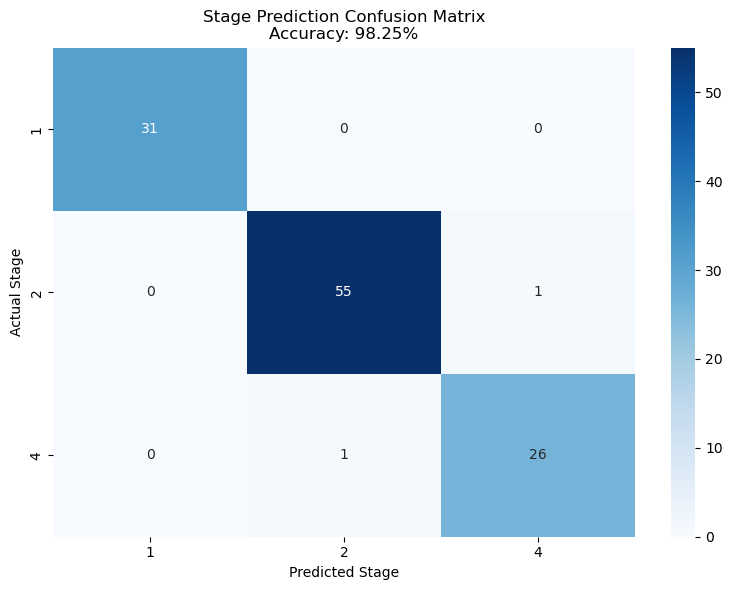


Confusion Matrix Interpretation:
Rows = Actual stages, Columns = Predicted stages
Diagonal (top-left to bottom-right) = Correct predictions
Off-diagonal = Misclassifications


In [21]:


# Calculate overall accuracy
accuracy = accuracy_score(y_test2, y_pred)
print(f"Overall Accuracy: {accuracy:.2%}")

print("\nDetailed Classification Report:")
print(classification_report(y_test2, y_pred, target_names=le.classes_))

# Confusion Matrix (shows correct vs incorrect predictions)
cm = confusion_matrix(y_test2, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Stage Prediction Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.ylabel('Actual Stage')
plt.xlabel('Predicted Stage')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("Rows = Actual stages, Columns = Predicted stages")
print("Diagonal (top-left to bottom-right) = Correct predictions")
print("Off-diagonal = Misclassifications")